In [ ]:
import os
COLAB_PROJECT_PATH = "{Add path to colab project path. Remember to download shark modules}"
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive',force_remount=True)
  os.chdir(COLAB_PROJECT_PATH)

In [ ]:
import sys
sys.path.append(('./shark_modules'))

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
# !pip install extraction
from extraction import visualize_data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import os
import re


shark_data = pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')

viz_shark_data = visualize_data(shark_data)

In [ ]:
viz_shark_data = viz_shark_data[viz_shark_data.species != 'N/A']
viz_shark_data

,type,activity,injury,species
0,unprovoked,surfing,Non-Fatal,White Shark
1,unprovoked,free diving,Fatal,White Shark
2,unprovoked,free diving,Non-Fatal,White Shark
3,unprovoked,surfing,Fatal,White Shark
4,unprovoked,swimming,Non-Fatal,White Shark
...,...,...,...,...
543,unprovoked,swimming,Non-Fatal,Sevengill Shark
544,unprovoked,surfing,Non-Fatal,Sevengill Shark
545,unprovoked,swimming,Non-Fatal,Sevengill Shark
546,unprovoked,bathing,Non-Fatal,Sevengill Shark


In [ ]:
viz_shark_data.value_counts()

type        activity                                             injury     species    
unprovoked  surfing                                              Non-Fatal  White Shark    36
            swimming                                             Fatal      White Shark    18
                                                                 Non-Fatal  Bull Shark     15
watercraft  fishing                                              Non-Fatal  White Shark    15
unprovoked  surfing                                              Non-Fatal  Tiger Shark    14
                                                                                           ..
            fishing for octopus                                  Fatal      White Shark     1
            floating                                             Non-Fatal  Nurse Shark     1
            floating in inflatable pool ring                     Non-Fatal  White Shark     1
            floating with life buoy after pilot launch capsized  F

In [ ]:
# get fatal ratios for visualization purposes

shark_groups = viz_shark_data.groupby("species")
fatal_data = {species: shark_groups.get_group(species)['injury'].value_counts() for species in shark_groups.groups}

fatal_ratios = {}
for data in fatal_data:
  # print(fatal_data[data])
  fatal_ratio = float(fatal_data[data].get(['Fatal'], 0) / fatal_data[data].sum() * 100)
  # print(f'{fatal_ratio:.2f}%')
  fatal_ratios[data] = round(fatal_ratio,2)

fatal_df = pd.DataFrame(fatal_ratios, index=['fatal ratios'])

fatal_df

,Blacktip Shark,Bull Shark,Grey Nurse Shark,Nurse Shark,Reef Shark,Sevengill Shark,Tiger Shark,White Shark
fatal ratios,0.0,27.71,0.0,0.0,0.0,0.0,34.78,27.85


In [ ]:
viz_shark_data.describe()

,type,activity,injury,species
count,548,516,548,548
unique,7,139,2,8
top,unprovoked,surfing,Non-Fatal,White
freq,430,84,424,219


In [ ]:
import seaborn as sns

In [ ]:
viz_shark_data['species'] = viz_shark_data['species'].apply(lambda x : x.replace('Shark',''))

<Axes: xlabel='species', ylabel='count'>

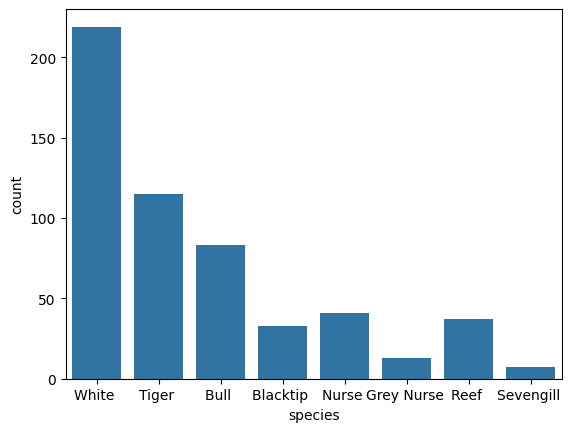

In [ ]:
sns.countplot(x='species', data=viz_shark_data)

<Axes: xlabel='injury', ylabel='count'>

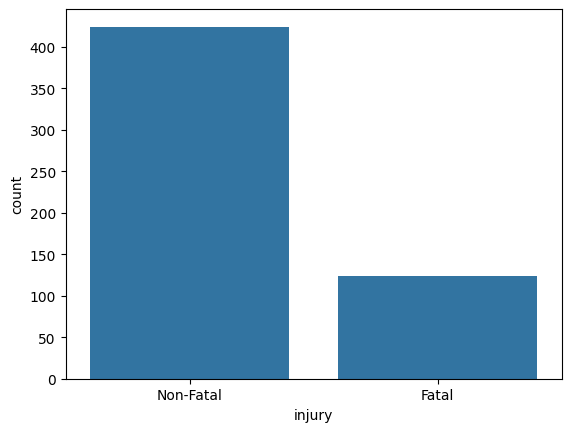

In [ ]:
sns.countplot(x='injury', data=viz_shark_data)